[View in Colaboratory](https://colab.research.google.com/github/redcican/Machine-Learning-Basic/blob/master/03_Regression_Predict_house_prices.ipynb)

In a regression problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where we aim to predict a discrete label. 

This notebook builds a model to predict the median price of homes in a Boston suburb during the mid-1970s. To do this, we'll provide the model with some data points about the subsurb, such as the crime rate and the local property tax rate.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

1.10.0


## 1. The Boston Housing Prices dataset

In [2]:
boston_housing = keras.datasets.boston_housing

(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
# Shuffle the training data
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

### 1.1 Example and features

This dataset is much smaller than the others , it has total 506 total examples are aplit between 404 training examples and 102 test examples

In [4]:
print("Training set: {}".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training set: (404, 13)
Testing set: (102, 13)


The dataset contains 13 different features: 



1.   Per capita crime rate
2.   The proportion of residential land zoned for lots over 25,000 square feet.
3.   The proportion of non-retail business acres per town.
4.   Charles River dummy variable( =1 if tract bounds river, 0 otherwise)
5.   Nitric oxides concentration
6.   The average number of rooms per dwelling
7.   The proportion of owner-occupied units built before 1940.
8.   Weighted distances to five Boston employment centers.
9.   Index of accessibility to radial highways
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000*(Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. Percentage lower stauts of the population.



In [5]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [6]:
import pandas as pd

columns_name = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
               'TAX','PTRATIO','B','LSTAT']

df = pd.DataFrame(train_data,columns=columns_name)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


### 1.2 Labels

The labels are the house prices in thousands of dollars

In [7]:
print(train_labels[0:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


##  2. Data Preprocessing

### 2.1 Normalize features

It's recommended to normalize feature that use different scales and ranges. For each feature, substract the mean of the feature and divide by the standard deviation.

In [8]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


## 3. Create the model

In [13]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                          input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## 4. Train the model

In [14]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0:
            print('')
        print('.',end='')
        
EPOCHS = 500

history = model.fit(train_data,train_labels,epochs=EPOCHS,
                   validation_split=0.2,verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

Visualize the model's training progress using the stats stored in the `history` object. We want to use this data to determine how long to train before the model stops making progress

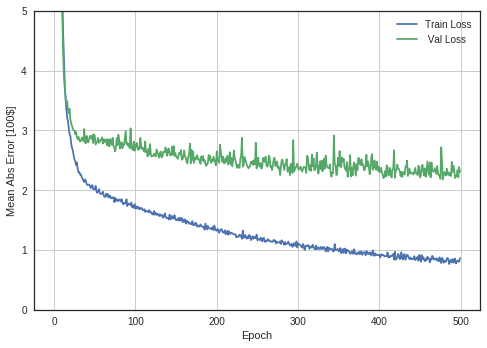

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def plt_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [100$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
            label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label=' Val Loss')
    plt.legend()
    plt.grid('on')
    plt.ylim([0,5])
    
plt_history(history)

This graph shows little improvement in the model after about 200 epochs. We will use a `callback` that tests a training condition for every epoch. If a set amount of epohcs elapes without showing improvement, then automatically stop the training.


....................................................................................................
...................................................................................

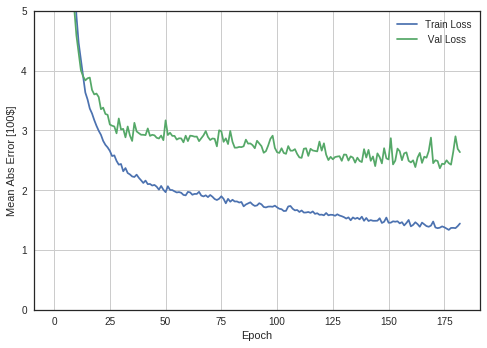

In [21]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[early_stop,PrintDot()])

plt_history(history)

## 5. Model Evaluation

In [23]:
[loss, mae] = model.evaluate(x=test_data, y=test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae*1000))

Testing set Mean Abs Error: $2686.36


## 6. Predict the housing prices

In [24]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 8.761633  19.302397  22.60368   35.311092  27.208616  23.031246
 26.64563   22.830471  19.378937  22.673407  19.639408  16.84214
 15.550776  43.380074  20.254665  21.352446  27.273918  19.56164
 19.86576   27.382135  11.565866  15.210098  22.117735  17.464167
 21.67757   25.674793  30.115765  31.203121  11.134534  20.546469
 20.841606  15.5859785 34.716953  25.341606  19.430056   8.64212
 18.091457  16.436504  20.341122  26.852966  33.391956  30.033377
 13.57053   44.62677   31.63357   27.106796  29.04086   19.901903
 22.428854  24.125408  35.39902   21.370848  10.68087   15.744433
 37.001198  29.779123  11.94151   50.844234  35.91924   25.722786
 25.845541  15.962705  14.953382  20.406488  24.83179   22.290573
 14.246566  23.23482   12.964313   7.276164  26.800303  30.377548
 26.803507  13.94298   26.075308  19.422289  19.693272  25.448818
 36.596134  10.660322  22.975077  38.998764  16.200083  13.503616
 18.743736  19.98813   20.752502  20.136784  21.395601  34.828957
 22.673208  2